Day 3: We have already Learned about Data Preprocessing and Feature Engineering. Let's take a Step Ahead and Learn How to actually Build ML Models and Train them.

To start with here are some basic types of ML problems and some Resources:
1. ML | Types of Learning by GeeksforGeeks https://www.geeksforgeeks.org/ml-types-learning-supervised-learning/
2. Which Machine Learning model to use?: https://towardsdatascience.com/which-machine-learning-model-to-use-db5fdf37f3dd
3. Classification problem: https://towardsdatascience.com/solving-a-simple-classification-problem-with-python-fruits-lovers-edition-d20ab6b071d2
4. Regression Problem: https://towardsdatascience.com/solving-regression-problems-by-combining-statistical-learning-with-machine-learning-82949f7ac18a
5: Official Documentation: https://scikit-learn.org/stable/supervised_learning.html

Task:
Do the modeling for these Datasets:
a) Predict Loan_Status (http://iali.in/datasets/loan_status_train.csv)
b) Predict rating (http://iali.in/datasets/cereal.csv) 
[observed Folks doing ctrl+c & ctrl+v from Kaggle hence hosted it on personal Server (it will be deleted after 2 days)]

For Advanced Users:
Analyze the Toxicity of comment's (Data
! wget https://www.dropbox.com/s/ggl9krhh6dcwhhz/train.csv
! wget https://www.dropbox.com/s/tst2y6mzwzbhxo3/test.csv)

In [0]:
# data visualization libraries:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ml libraries
from sklearn import linear_model, preprocessing, model_selection
import numpy as np
from sklearn import tree

from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [0]:
# read csv
df = pd.read_csv("https://raw.githubusercontent.com/altaf99/10daysofMLChallenge-COVID19/master/Day3/dataset/cereal.csv")

In [0]:
#show 10 records
df.head(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.384843
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813


In [0]:
## adding manufacturing column

manufacturer = {"A":"American Home Food Products",
               "G":"General Mills",
               "K":"Kelloggs",
               "N":"Nabisco",
               "P":"Post",
               "Q":"Quaker Oats",
               "R":"Ralston Purina"}

df["Manufacturer"] = df["mfr"].map(manufacturer)
df.head(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Manufacturer
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973,Nabisco
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679,Quaker Oats
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505,Kelloggs
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912,Kelloggs
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.384843,Ralston Purina
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541,General Mills
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094,Kelloggs
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562,General Mills
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253,Ralston Purina
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813,Post


In [0]:
# Summary of numerical variables for training data set

df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [0]:
criteria_1 = df["carbo"] < 0
criteria_2 = df["sugars"] < 0
criteria_3 = df["potass"] < 0

df[criteria_1 | criteria_2 | criteria_3]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Manufacturer
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Ralston Purina
20,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,-1,0,2,1.0,1.00,64.533816,Nabisco
57,Quaker Oatmeal,Q,H,100,5,2,0,2.7,-1.0,-1,110,0,1,1.0,0.67,50.828392,Quaker Oats


Only 3 out of 77 entries (~4% of the data) is affected. These entries should either be dropped or the -1 value should be changed to 0 depending on the course of action.

# Numerical data are normalized to per ounce (according to the weight column)

In [0]:
df[df["weight"] < 1].head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Manufacturer
54,Puffed Rice,Q,C,50,1,0,0,0.0,13.0,0,15,0,3,0.50,1.0,60.756112,Quaker Oats
55,Puffed Wheat,Q,C,50,2,0,0,1.0,10.0,0,50,0,3,0.50,1.0,63.005645,Quaker Oats
63,Shredded Wheat,N,C,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1.0,68.235885,Nabisco


In [0]:
cols = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']

for i in cols:
    df[i] = (df[i]/df["weight"]).round(0).astype(int)

In [0]:
df[df["weight"] < 1].head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Manufacturer
54,Puffed Rice,Q,C,100,2,0,0,0,26,0,30,0,3,0.50,1.0,60.756112,Quaker Oats
55,Puffed Wheat,Q,C,100,4,0,0,2,20,0,100,0,3,0.50,1.0,63.005645,Quaker Oats
63,Shredded Wheat,N,C,96,2,0,0,4,19,0,114,0,1,0.83,1.0,68.235885,Nabisco


# Data visualisation
1) Visualising the ratings across the different manufacturers

In [0]:
df["Manufacturer"].value_counts()

Kelloggs                       23
General Mills                  22
Post                            9
Ralston Purina                  8
Quaker Oats                     8
Nabisco                         6
American Home Food Products     1
Name: Manufacturer, dtype: int64

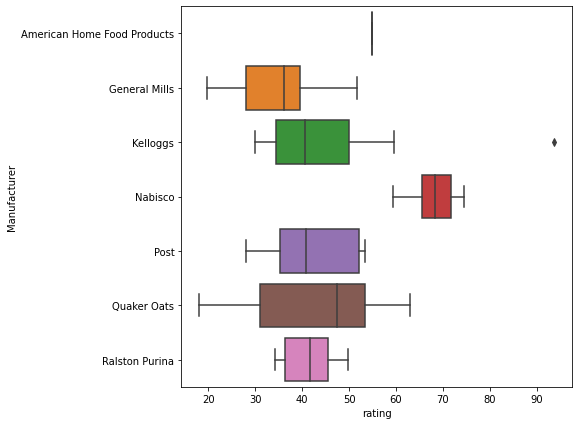

In [0]:
fig, ax = plt.subplots(figsize = (7,7))
sns.boxplot(y = "Manufacturer", x = "rating", data = df.sort_values("Manufacturer"))

In [0]:
criteria_1 = df["Manufacturer"] == "Kelloggs"
criteria_2 = df["rating"] > 90

df[criteria_1 & criteria_2]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Manufacturer
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1.0,0.5,93.704912,Kelloggs




*   It seems that Nabisco cereals are quite well received with most of the cereal rated around 70. Despite that, this cannot be generalised to all of Nabisco cereals as there are only 6 Nabisco cereals in the dataset.
*   The rest of the cereals are rated between 30 to 50 with the exception of a Kelloggs cereal (90+) and American Home Food Products.
*   That exceptional Kelloggs cereal is All-Bran with Extra Fiber. What could possible make this cereal standout from the rest?

*   Nothing much can be said about American Home Food Products as there is only 1 cereal.
*   The manufacturer may play a role in the rating among the consumers.

2) Visualising the rating against the 3 macros (protein, fat and carbo) and also the calories

In [0]:
def scatter_this(macro,y):
    fig, ax = plt.subplots(figsize = (4,4))
    sns.regplot(x = macro, y = y, data = df)
    plt.title("%s vs %s" %(y, macro))

In [0]:
df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating', 'Manufacturer'],
      dtype='object')

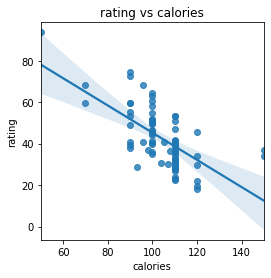

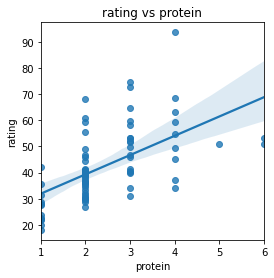

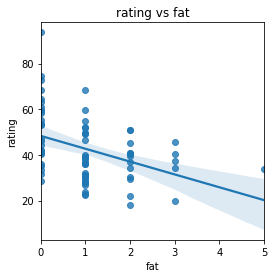

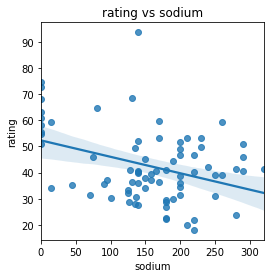

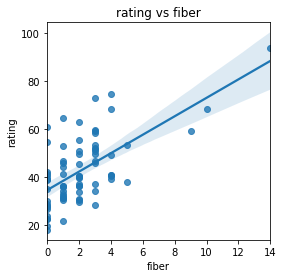

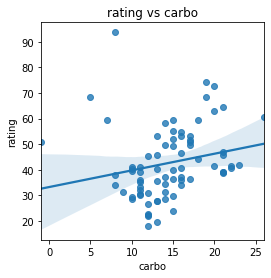

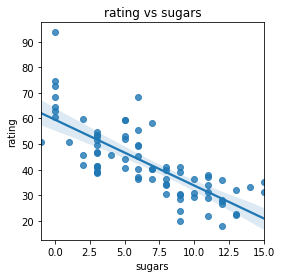

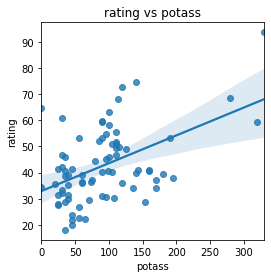

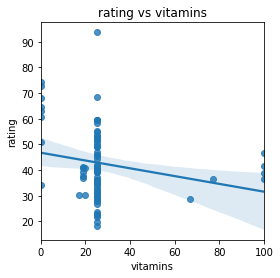

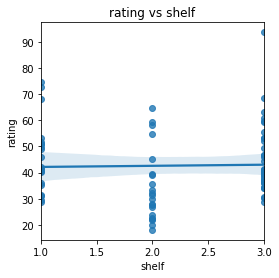

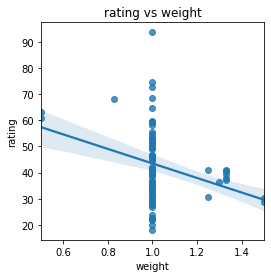

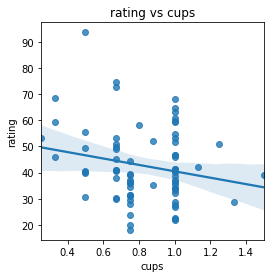

In [0]:
cols = df.columns[3:15]

for i in cols:
    scatter_this(i,"rating")

There is some correlation between rating with calories, protein, fat and sugars. These few attributes should be used to model and predict the rating first. Should the performance of the model is too weak, then other attributes should be looked at.

It is interesting to find that sugars has a stronger correlation with rating than carbo although carbo is a superset of sugars.

# Linear Regression Model

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [0]:
X = df[["calories","protein","fat","sugars"]]
y = df["rating"]

In [0]:
## taking testing data 25%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

In [0]:
r2_4 = r2_score(y_test, y_pred)
r2_4

0.8021814112110947

# Can the linear regression model be improved with more attributes?

In [0]:
X = df[["calories","protein","fat","sugars","carbo"]]
y = df["rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

In [0]:
r2_5 = r2_score(y_test, y_pred)
r2_5

0.6984501973920221

In [0]:
X = df[["calories","protein","fat","sugars","potass"]]
y = df["rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

In [0]:
r2_6 = r2_score(y_test, y_pred)
r2_6

0.7183782180817728

In [0]:
X = df[['calories', 'protein', 'fat', 'sodium', 'fiber','carbo', 'sugars', 'potass', 'vitamins']]
y = df["rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

In [0]:
r2_all = r2_score(y_test, y_pred)
r2_all

0.9773984618239895

# Consluion
If you were to repeat the linear regression model part again, you'll notice the R2 value of the linear regression change. The R2 value can be significantly high or low depending on the distribution of the samples between the training and testing sets. In one trial, the training set may contain dataset that very scattered and in another trial, the training set may have dataset that is not so scattered.

Irregardless, the model is shown to fit quite well when all the attributes are used to estimate the cereal rating.